In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
seismic_df = pd.read_csv("seismic_data.csv")
print("test")

test


In [14]:
# When loading the "Earthquakes_2010_2023.csv", it gave an error (UnicodeDecodeError)
# Therefore, importing chardet to check what encoding the file actually uses

import chardet

with open("Earthquakes_2010_2023.csv", 'rb') as f:
    result = chardet.detect(f.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [15]:
eq_df = pd.read_csv("Earthquakes_2010_2023.csv", encoding='Windows-1252')

In [16]:
seismic_df

,Seismic Zone,PGA (m/s²),PGV (m/s),PGD (m),Spectral Acceleration (g),Soil Type,Site Amplification Factor,Historical Earthquake Magnitude (Mw),Fault Distance (km),Seismic Wave Frequency (Hz),...,Mass of Structure (kg),Axial Stiffness (kN/m),Bending Stiffness (kN·m²),Lateral Load Resisting System,Predicted Max Inter-Story Drift Ratio (%),Predicted Max Roof Displacement (m),Predicted Base Shear Force (kN),Predicted Structural Acceleration (m/s²),Predicted Damage Index (0–1 Scale),Predicted Collapse Probability (%)
0,High,0.378901,0.312027,0.057183,0.634076,Sand,0.939157,6.875154,22.203449,1.683141,...,737892.38060,3150.171653,25771.750960,Moment Frame,2.126096,0.839807,3927.940393,0.767494,0.804542,80.454180
1,Very High,1.346301,1.255807,0.204481,1.728551,Clay,1.089761,6.829334,6.947244,4.041680,...,68704.84638,3245.337590,32856.945000,Moment Frame,2.880256,1.530932,2923.719143,1.848156,0.706411,70.641053
2,Low,0.502373,0.633995,0.443304,0.156820,Rock,2.689239,7.100447,33.224830,5.841681,...,705858.69300,7518.106276,16777.171280,Moment Frame,2.762881,0.796000,180.446915,4.455967,0.795635,79.563529
3,High,0.614900,0.429642,0.024551,1.085648,Rock,2.194323,7.871919,15.225075,9.485727,...,937792.30750,781.139234,3013.866452,Braced Frame,2.965618,1.303857,4136.426423,3.787915,0.766775,76.677520
4,High,0.181329,0.821528,0.480747,0.383056,Rock,1.357043,8.841107,71.283374,0.780634,...,728244.97580,4118.984745,25287.554730,Braced Frame,0.819418,1.519645,926.867918,1.460147,0.205368,20.536788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Low,0.134960,1.374925,0.029051,0.358366,Rock,2.716129,5.635004,70.917017,7.075402,...,368423.97280,4686.711203,44596.512310,Braced Frame,3.721604,0.334625,4588.311350,3.356674,0.458558,45.855848
996,Low,0.728654,1.424346,0.374013,0.321541,Sand,1.553135,8.148287,78.482505,1.082026,...,369161.28580,8067.613896,20357.781910,Moment Frame,1.562331,0.038239,3821.131803,0.317926,0.646422,64.642205
997,Very High,0.432470,0.789667,0.425576,0.687566,Rock,2.493499,8.762268,46.076523,9.097986,...,565425.58160,8683.726878,36165.271700,Braced Frame,2.295841,0.882552,1688.343205,3.953573,0.761871,76.187113
998,Very High,0.169460,1.770631,0.143781,1.473094,Clay,2.034983,5.111697,70.109360,2.228723,...,232365.80870,8536.894335,47038.670460,Shear Wall,1.690556,1.460479,2540.157807,4.572299,0.231115,23.111530


In [17]:
eq_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2010-01-29T23:22:52.490Z,51.841000,177.738000,48.200,3.60,ml,19.0,201.5,NaN,NaN,...,2018-07-06T19:53:37.173Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,aeic,aeic
1,2010-01-29T22:25:34.910Z,51.672000,177.745000,73.000,5.00,mb,218.0,115.0,NaN,0.86,...,2018-07-06T19:53:29.300Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,NaN,2.800,NaN,104.0,reviewed,us,us
2,2010-01-29T20:47:53.200Z,1.585000,-90.602000,10.000,5.60,mwc,138.0,80.1,NaN,1.07,...,2022-05-02T21:35:53.294Z,"259 km N of Puerto Ayora, Ecuador",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
3,2010-01-29T20:38:08.450Z,1.514000,-90.714000,10.000,5.20,mwc,35.0,159.9,NaN,1.15,...,2016-11-10T02:23:29.680Z,"253 km N of Puerto Ayora, Ecuador",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
4,2010-01-29T17:52:23.040Z,4.726000,-75.971000,131.500,4.90,mwc,227.0,52.5,NaN,0.95,...,2022-07-16T01:38:25.589Z,"6 km WSW of Cartago, Colombia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243722,2023-04-01T02:18:48.550Z,2.834600,127.183300,24.303,4.30,mb,20.0,131.0,2.05700,0.95,...,2023-04-07T00:10:37.040Z,Molucca Sea,earthquake,11.78,6.441,0.148,14.0,reviewed,us,us
243723,2023-04-01T02:06:43.037Z,56.766500,-154.630500,9.900,3.00,ml,NaN,NaN,NaN,0.65,...,2023-04-07T00:01:04.319Z,"34 km SW of Akhiok, Alaska",earthquake,NaN,0.500,NaN,NaN,reviewed,ak,ak
243724,2023-04-01T01:16:07.810Z,33.381667,-116.909667,12.960,4.15,mw,153.0,18.0,0.09988,0.21,...,2023-04-13T23:16:58.312Z,"5km NW of Palomar Observatory, CA",earthquake,0.10,0.370,NaN,6.0,reviewed,ci,ci
243725,2023-04-01T00:47:43.686Z,-20.926400,-70.471500,31.966,4.20,mb,28.0,125.0,0.66500,0.85,...,2023-04-08T02:12:03.321Z,"Near the coast of Tarapaca, Chile",earthquake,4.49,6.671,0.175,9.0,reviewed,us,us


In [18]:
print(seismic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Seismic Zone                               1000 non-null   object 
 1   PGA (m/s²)                                 1000 non-null   float64
 2   PGV (m/s)                                  1000 non-null   float64
 3   PGD (m)                                    1000 non-null   float64
 4   Spectral Acceleration (g)                  1000 non-null   float64
 5   Soil Type                                  1000 non-null   object 
 6   Site Amplification Factor                  1000 non-null   float64
 7   Historical Earthquake Magnitude (Mw)       1000 non-null   float64
 8   Fault Distance (km)                        1000 non-null   float64
 9   Seismic Wave Frequency (Hz)                1000 non-null   float64
 10  Building Height (m)      

In [19]:
print(eq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243727 entries, 0 to 243726
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             243727 non-null  object 
 1   latitude         243727 non-null  float64
 2   longitude        243727 non-null  float64
 3   depth            243727 non-null  float64
 4   mag              243727 non-null  float64
 5   magType          243726 non-null  object 
 6   nst              91779 non-null   float64
 7   gap              229513 non-null  float64
 8   dmin             172733 non-null  float64
 9   rms              231168 non-null  float64
 10  net              243727 non-null  object 
 11  id               243727 non-null  object 
 12  updated          243727 non-null  object 
 13  place            242313 non-null  object 
 14  type             243727 non-null  object 
 15  horizontalError  163092 non-null  float64
 16  depthError       212033 non-null  floa

In [20]:
seismic_df.shape

(1000, 26)

In [21]:
eq_df.shape

(243727, 22)

In [22]:
print(seismic_df.columns)

Index(['Seismic Zone', 'PGA (m/s²)', 'PGV (m/s)', 'PGD (m)',
       'Spectral Acceleration (g)', 'Soil Type', 'Site Amplification Factor',
       'Historical Earthquake Magnitude (Mw)', 'Fault Distance (km)',
       'Seismic Wave Frequency (Hz)', 'Building Height (m)',
       'Number of Stories', 'Structural Material', 'Foundation Type',
       'Natural Frequency (Hz)', 'Damping Ratio (%)', 'Mass of Structure (kg)',
       'Axial Stiffness (kN/m)', 'Bending Stiffness (kN·m²)',
       'Lateral Load Resisting System',
       'Predicted Max Inter-Story Drift Ratio (%)',
       'Predicted Max Roof Displacement (m)',
       'Predicted Base Shear Force (kN)',
       'Predicted Structural Acceleration (m/s²)',
       'Predicted Damage Index (0–1 Scale)',
       'Predicted Collapse Probability (%)'],
      dtype='object')


In [23]:
print(eq_df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [24]:
print("\nMissing values:", seismic_df.isnull().sum().sum())
print(seismic_df.isnull().sum())


Missing values: 0
Seismic Zone                                 0
PGA (m/s²)                                   0
PGV (m/s)                                    0
PGD (m)                                      0
Spectral Acceleration (g)                    0
Soil Type                                    0
Site Amplification Factor                    0
Historical Earthquake Magnitude (Mw)         0
Fault Distance (km)                          0
Seismic Wave Frequency (Hz)                  0
Building Height (m)                          0
Number of Stories                            0
Structural Material                          0
Foundation Type                              0
Natural Frequency (Hz)                       0
Damping Ratio (%)                            0
Mass of Structure (kg)                       0
Axial Stiffness (kN/m)                       0
Bending Stiffness (kN·m²)                    0
Lateral Load Resisting System                0
Predicted Max Inter-Story Drift Ratio (%)

In [25]:
print("\nMissing values:", eq_df.isnull().sum().sum())
print(eq_df.isnull().sum())


Missing values: 470497
time                    0
latitude                0
longitude               0
depth                   0
mag                     0
magType                 1
nst                151948
gap                 14214
dmin                70994
rms                 12559
net                     0
id                      0
updated                 0
place                1414
type                    0
horizontalError     80635
depthError          31694
magError            70937
magNst              36101
status                  0
locationSource          0
magSource               0
dtype: int64


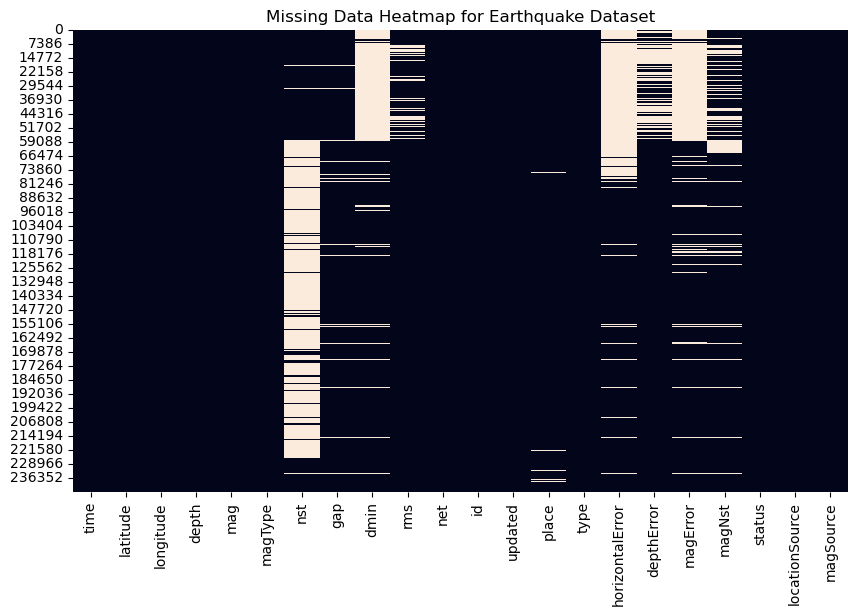

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(eq_df.isnull(), cbar=False)
plt.title('Missing Data Heatmap for Earthquake Dataset')
plt.show()

In [26]:
# Drop the incomplete or redundant columns
cols_to_drop = ['nst', 'dmin', 'magNst', 'horizontalError', 'magError']
eq_df = eq_df.drop(columns=[col for col in cols_to_drop if col in eq_df.columns])

# Fill missing values for the ones we keep
eq_df['magType'] = eq_df['magType'].fillna(eq_df['magType'].mode()[0])
eq_df['gap'] = eq_df['gap'].fillna(eq_df['gap'].median())
eq_df['rms'] = eq_df['rms'].fillna(eq_df['rms'].median())
eq_df['place'] = eq_df['place'].fillna('Unknown')
eq_df['depthError'] = eq_df['depthError'].fillna(eq_df['depthError'].median())

# Double check
print(eq_df.isnull().sum())

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
gap               0
rms               0
net               0
id                0
updated           0
place             0
type              0
depthError        0
status            0
locationSource    0
magSource         0
dtype: int64


Columns with excessive missing data (>25%) such as nst, dmin, magNst, horizontalError, and magError were removed to reduce noise and prevent unreliable imputation. (We can discuss magError - drop or to keep)
Features such as gap, rms, place, and depthError were retained due to their relatively low missingness and potential relevance to earthquake data quality or geographic context.
| Column              | Missing Count  | Meaning                                                | Usefulness | Recommendation      | Reason                                                                             |
| ------------------- | -------------- | ------------------------------------------------------ | ---------- | ------------------- | ---------------------------------------------------------------------------------- |
| **nst**             | 151,948 (~62%) | Number of seismic stations used to locate the event    | ❌ Low      | **Drop**            | Too incomplete; high missing rate makes imputation unreliable and adds noise       |
| **gap**             | 14,214 (~6%)   | Azimuthal gap between stations (data coverage quality) | ✅ Moderate | **Keep**            | Useful feature for location reliability; missing small portion → can impute median |
| **dmin**            | 70,994 (~30%)  | Distance to nearest station (in degrees)               | ⚠️ Medium  | **Drop**            | Missing too much and often correlated with latitude/longitude anyway               |
| **rms**             | 12,559 (~5%)   | Root mean square of residuals in travel times          | ✅ Keep     | **Keep**            | Measures data quality; small missing portion → impute median                       |
| **place**           | 1,414 (<1%)    | Text location (e.g., “5km SE of Tokyo”)                | ✅ Keep     | **Keep**            | Can extract regional labels for risk zone classification                           |
| **magNst**          | 36,101 (~15%)  | Number of stations used to compute magnitude           | ⚠️ Medium  | **Drop**            | Missing moderately; overlaps conceptually with `nst`; redundant                    |
| **horizontalError** | 80,635 (~33%)  | Error in location horizontally (km)                    | ⚠️ Medium  | **Drop**            | Too incomplete, also less directly related to classification targets               |
| **depthError**      | 31,694 (~13%)  | Error in depth measurement (km)                        | ✅ Keep     | **Keep**            | Adds context to uncertainty in depth, which might influence magnitude/damage       |
| **magError**        | 70,937 (~29%)  | Error in magnitude estimate                            | ⚠️ Medium  | **Drop (optional)** | If retained, you’ll need heavy imputation; otherwise may add noise                 |


In [27]:
print("Duplicate rows:", seismic_df.duplicated().sum())

Duplicate rows: 0


In [28]:
print("Duplicate rows:", eq_df.duplicated().sum())

Duplicate rows: 615


In [29]:
eq_df[eq_df.duplicated()]

,time,latitude,longitude,depth,mag,magType,gap,rms,net,id,updated,place,type,depthError,status,locationSource,magSource
4085,2010-03-01T23:26:57.930Z,-35.0530,-71.8040,35.000,4.90,mb,114.9,0.89,us,usp000h8f4,2022-05-02T21:40:35.804Z,"43 km NNW of Talca, Chile",earthquake,4.665,reviewed,us,us
4086,2010-03-01T23:26:29.000Z,32.2240,47.9440,9.400,4.20,ml,95.8,0.76,us,usp000h8f3,2014-11-07T01:40:52.945Z,"28 km W of Sh?sh, Iran",earthquake,4.665,reviewed,teh,thr
4087,2010-03-01T23:17:22.330Z,54.0720,-166.1600,114.500,3.00,m,143.2,0.76,us,usp000h8f2,2018-07-06T20:08:42.272Z,"25 km WSW of Akutan, Alaska",earthquake,4.665,reviewed,aeic,aeic
4088,2010-03-01T22:40:18.020Z,-34.8310,-73.8140,35.000,5.00,mwc,88.8,0.98,us,usp000h8f1,2016-11-10T02:24:59.126Z,"139 km WNW of Constitución, Chile",earthquake,4.665,reviewed,us,gcmt
4089,2010-03-01T22:39:12.210Z,-36.0470,-72.8070,35.000,4.20,mb,116.5,0.96,us,usp000h8f0,2014-11-07T01:40:52.919Z,"35 km NW of Quirihue, Chile",earthquake,4.665,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243114,2023-03-01T01:14:34.715Z,57.2915,-154.2360,40.200,3.20,ml,111.0,0.48,ak,ak0232r8xby9,2023-04-06T02:32:14.040Z,"31 km SSW of Larsen Bay, Alaska",earthquake,0.400,reviewed,ak,ak
243115,2023-03-01T01:09:30.370Z,19.5491,-65.3798,57.000,3.94,md,270.0,0.30,pr,pr2023060000,2023-03-01T04:41:52.040Z,Puerto Rico region,earthquake,10.750,reviewed,pr,pr
243116,2023-03-01T01:01:23.345Z,17.8244,146.3299,10.000,4.30,mb,153.0,0.31,us,us7000ji7r,2023-03-21T03:24:41.040Z,"295 km NNE of Saipan, Northern Mariana Islands",earthquake,1.924,reviewed,us,us
243117,2023-03-01T00:37:18.654Z,-22.5991,-175.0747,10.000,4.90,mb,115.0,0.79,us,us7000jgf4,2023-03-21T05:42:59.040Z,"140 km S of ‘Ohonua, Tonga",earthquake,1.841,reviewed,us,us


In [30]:
# Drop complete duplicate rows
eq_df = eq_df.drop_duplicates().reset_index(drop=True)

print("Remaining duplicates:", eq_df.duplicated().sum())

Remaining duplicates: 0


Each row represents a unique earthquake event and duplicates are just data repetition from the source therefore it was safer to drop them (my opinion - it might be wrong) 

In [31]:
num_cols_s = seismic_df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", num_cols_s.tolist())

Numeric columns: ['PGA (m/s²)', 'PGV (m/s)', 'PGD (m)', 'Spectral Acceleration (g)', 'Site Amplification Factor', 'Historical Earthquake Magnitude (Mw)', 'Fault Distance (km)', 'Seismic Wave Frequency (Hz)', 'Building Height (m)', 'Number of Stories', 'Natural Frequency (Hz)', 'Damping Ratio (%)', 'Mass of Structure (kg)', 'Axial Stiffness (kN/m)', 'Bending Stiffness (kN·m²)', 'Predicted Max Inter-Story Drift Ratio (%)', 'Predicted Max Roof Displacement (m)', 'Predicted Base Shear Force (kN)', 'Predicted Structural Acceleration (m/s²)', 'Predicted Damage Index (0–1 Scale)', 'Predicted Collapse Probability (%)']


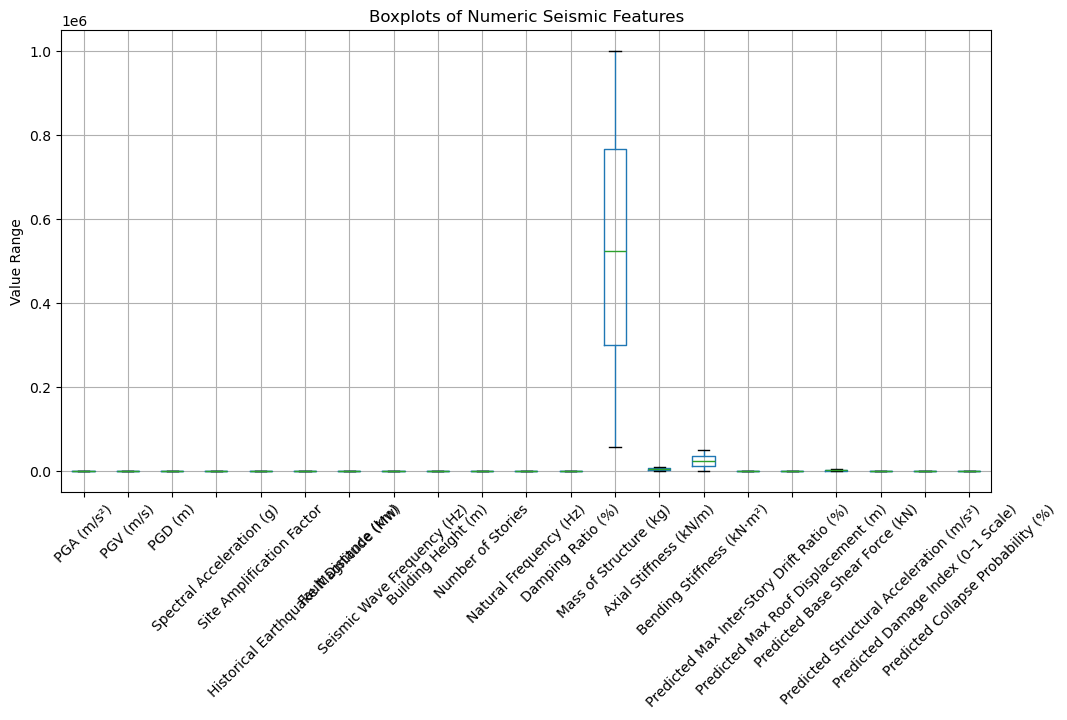

In [32]:
plt.figure(figsize=(12, 6))
seismic_df[num_cols_s].boxplot()
plt.title('Boxplots of Numeric Seismic Features')
plt.ylabel('Value Range')
plt.xticks(rotation=45)
plt.show()

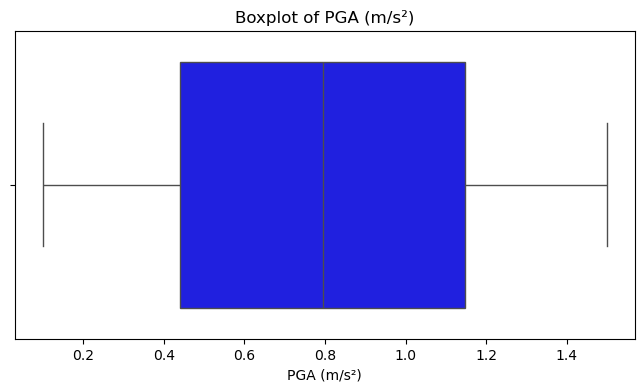

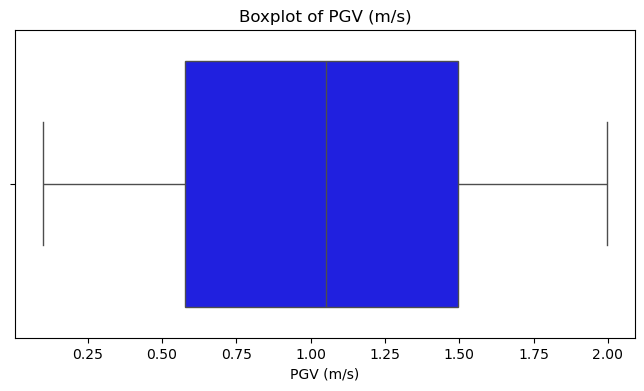

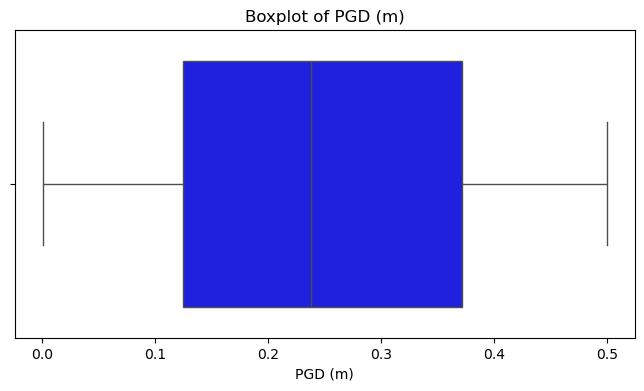

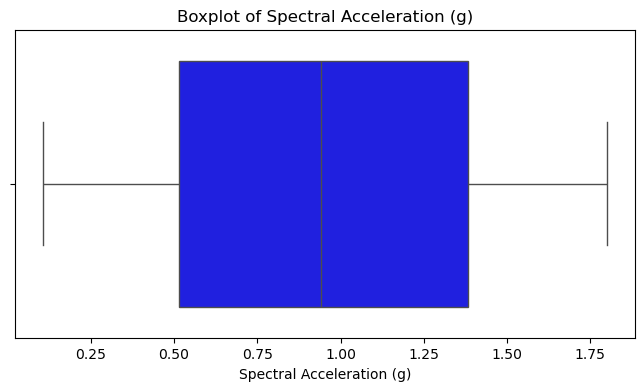

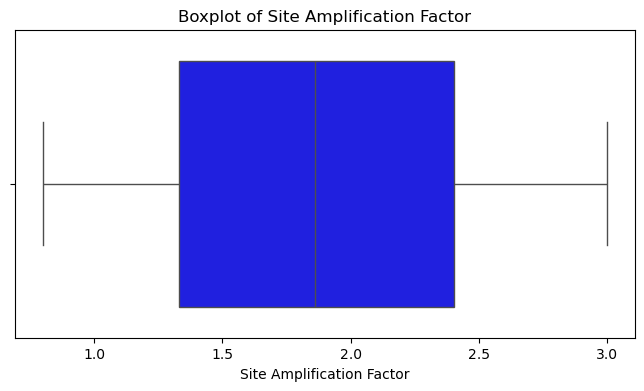

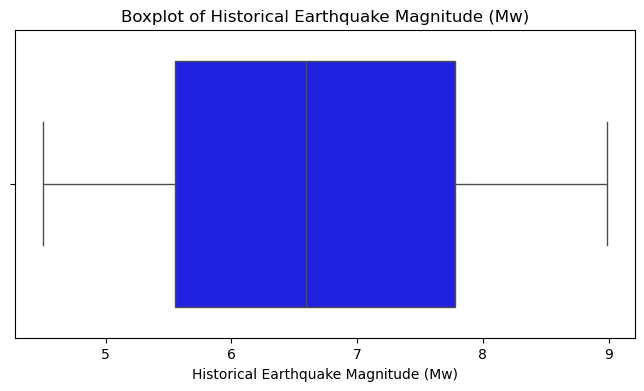

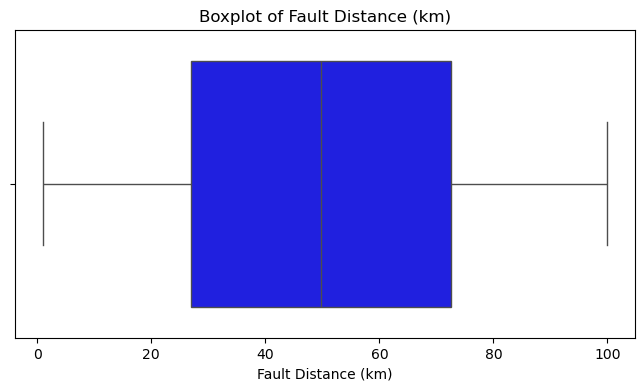

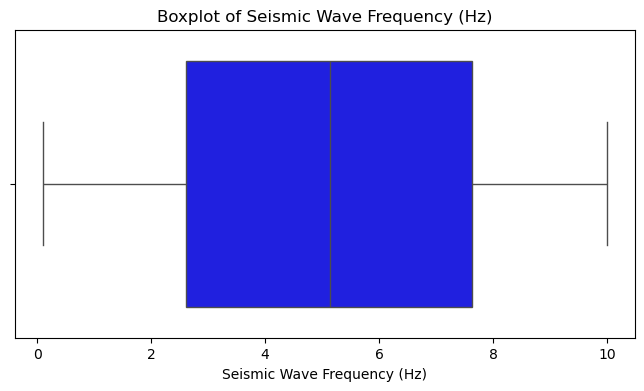

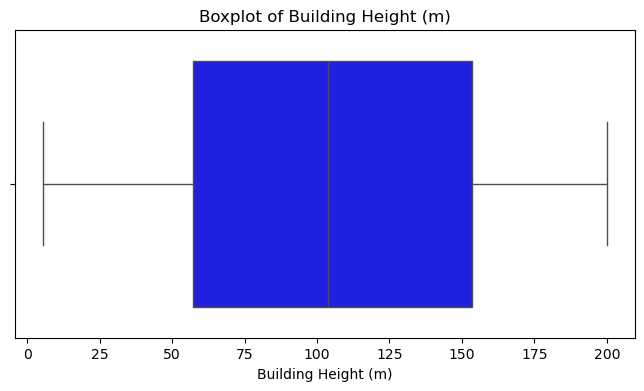

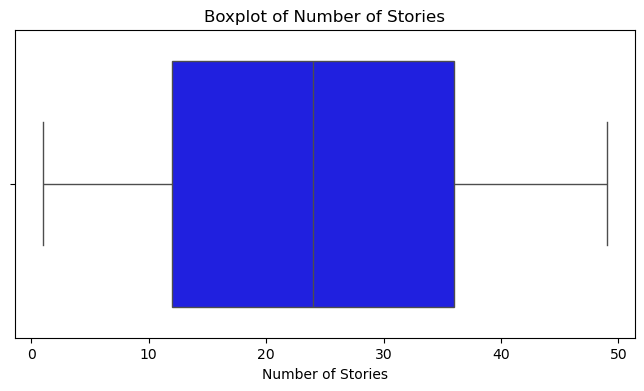

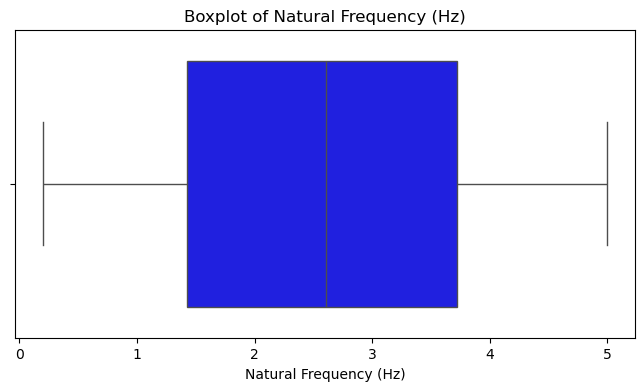

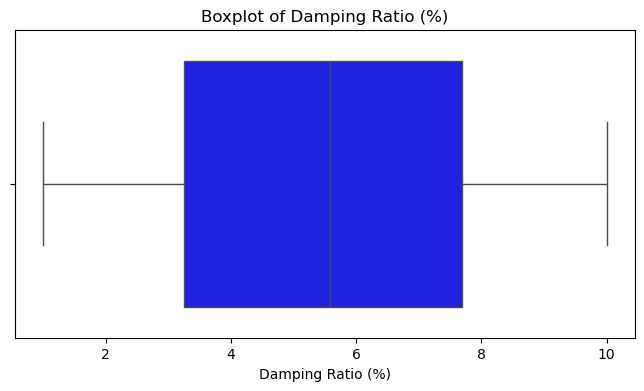

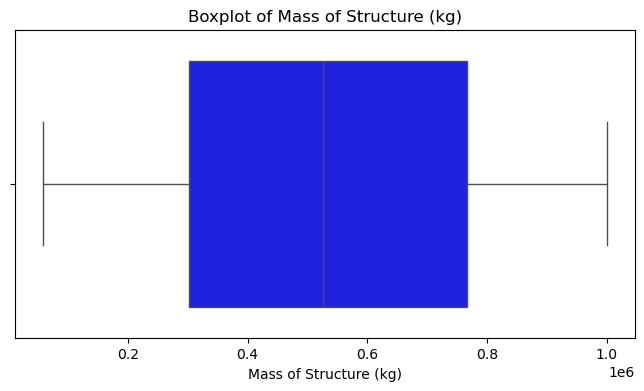

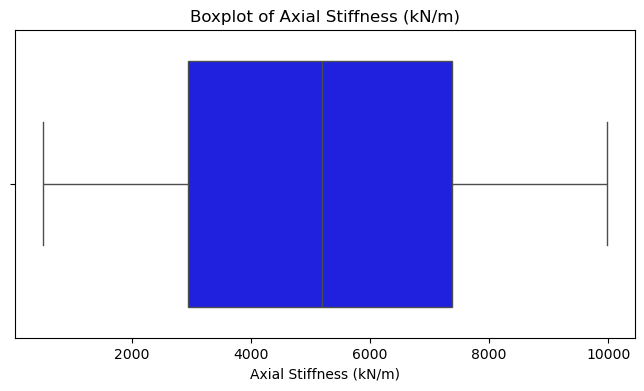

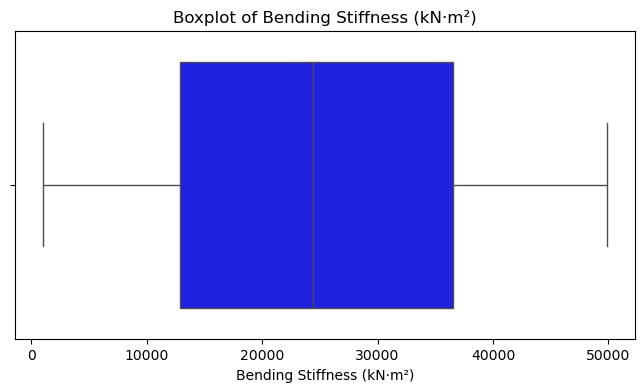

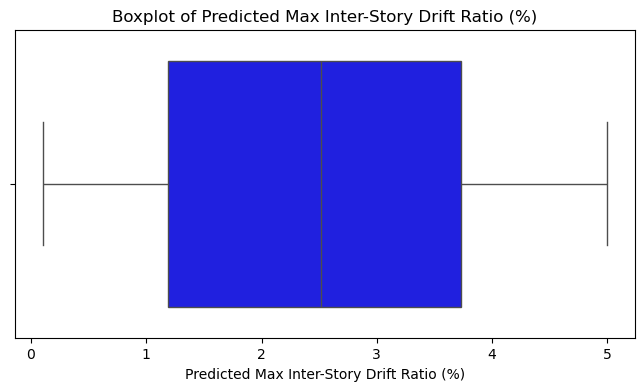

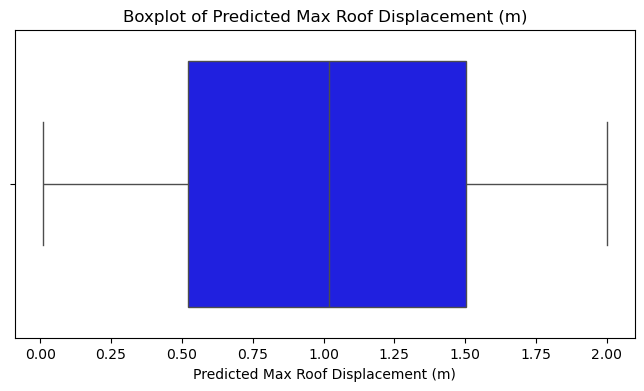

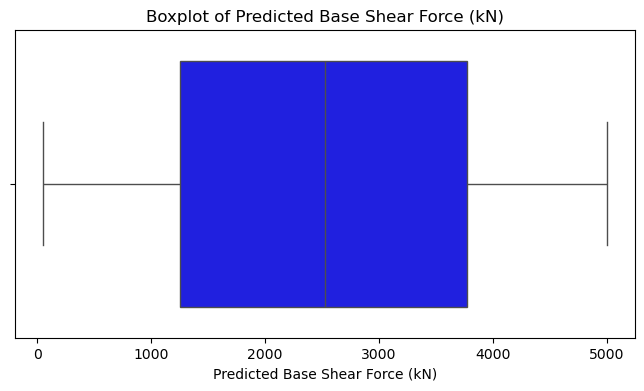

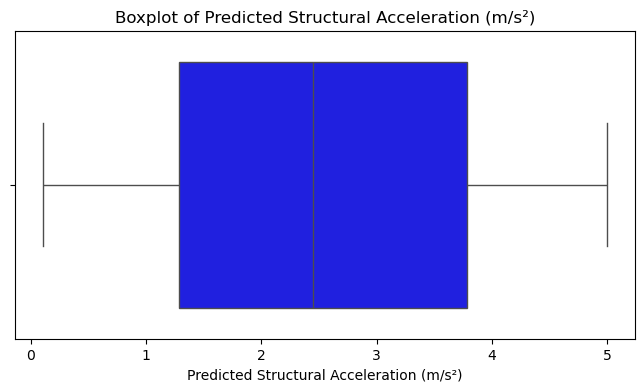

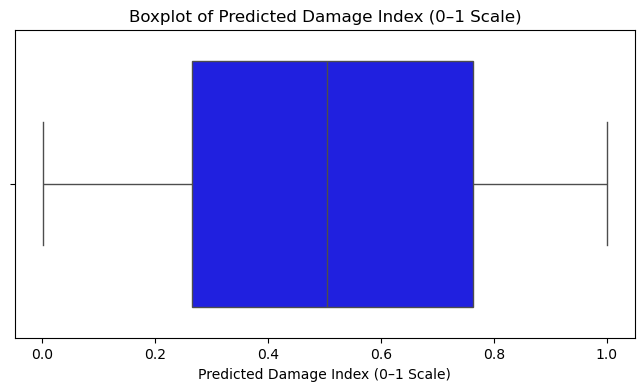

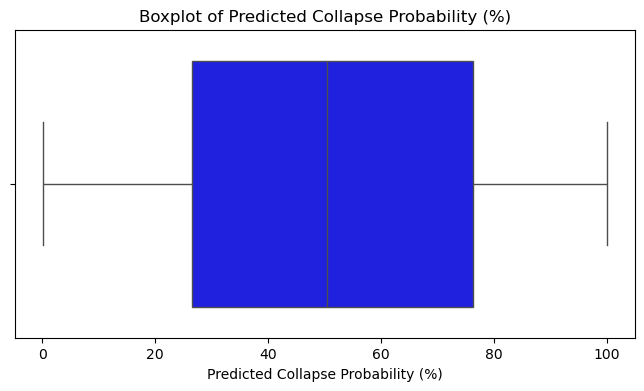

In [33]:
for col in num_cols_s:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=seismic_df[col], color='blue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

Seismic dataset has no outliers as you can see from the boxplots

In [34]:
# Set a consistent style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [35]:
print(eq_df.columns.tolist())

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'rms', 'net', 'id', 'updated', 'place', 'type', 'depthError', 'status', 'locationSource', 'magSource']


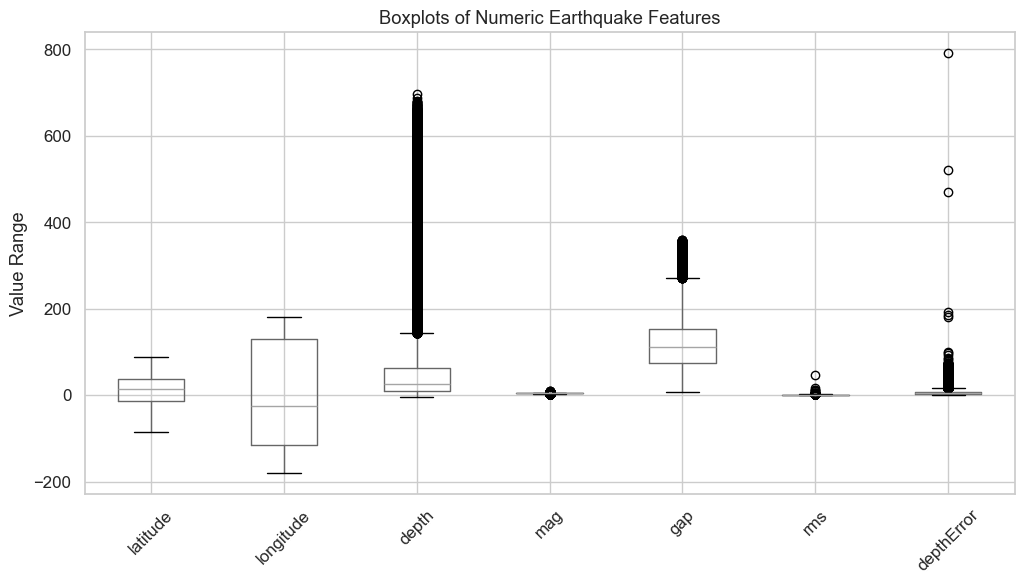

In [36]:
# List of numeric columns to visualize - floats and integers only - no objects
num_cols_e = ['latitude', 'longitude', 'depth', 'mag', 'gap', 'rms', 'depthError']

# Create boxplots for each numeric feature
plt.figure(figsize=(12, 6))
eq_df[num_cols_e].boxplot()
plt.title('Boxplots of Numeric Earthquake Features')
plt.ylabel('Value Range')
plt.xticks(rotation=45)
plt.show()

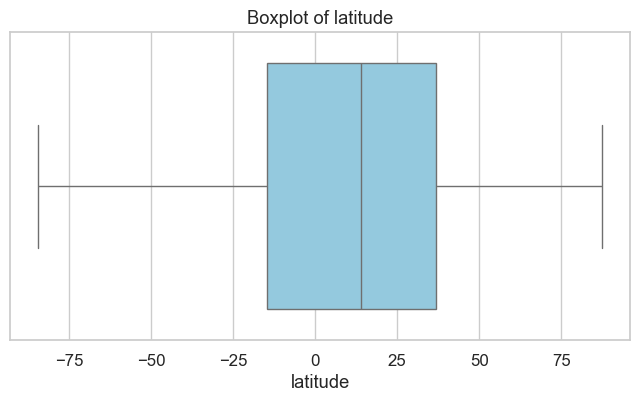

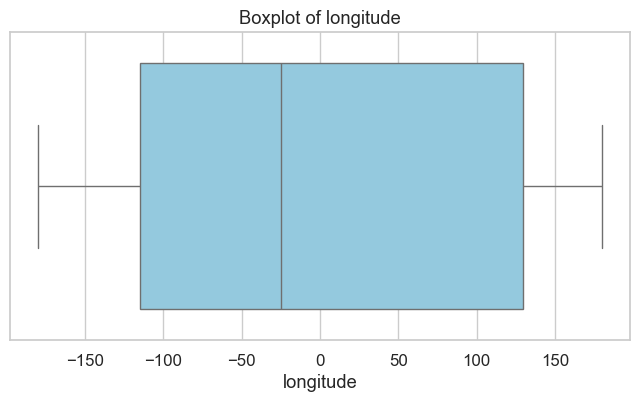

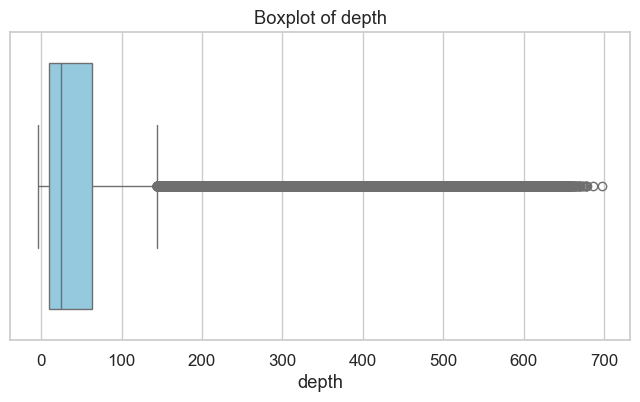

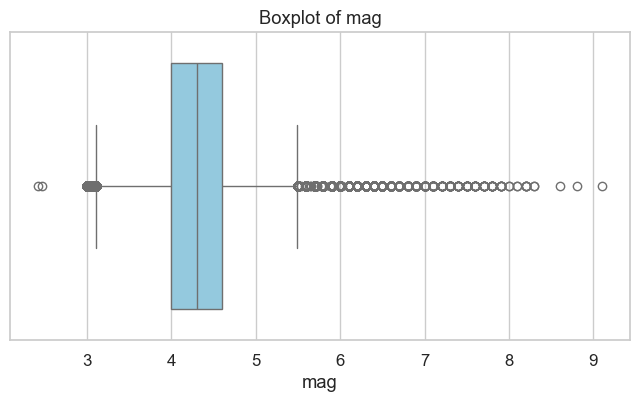

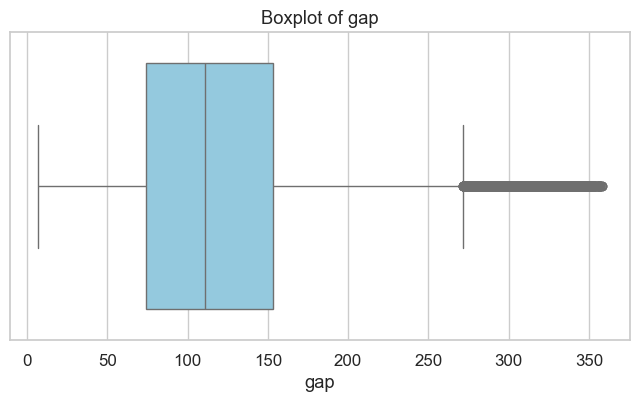

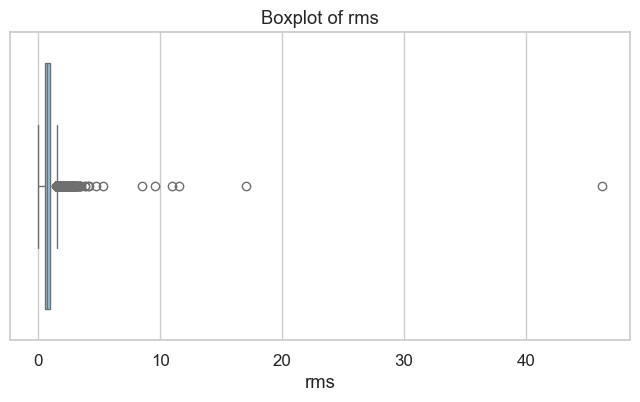

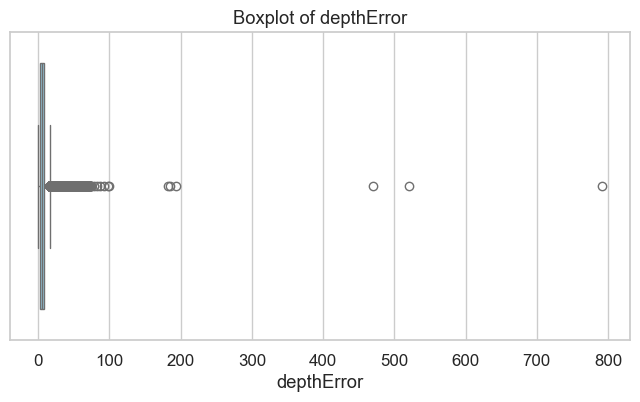

In [37]:
for col in num_cols_e:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=eq_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

Latitude and Longitude have no outliers

| Feature      | Typical Pattern                     | Interpretation                                      |
| ------------ | ----------------------------------- | --------------------------------------------------- |
| `mag`        | Usually between 2–8, few >8         | Outliers may be true large quakes — keep!           |
| `depth`      | Right-skewed, 0–700 km              | Extremely deep (>700 km) might be measurement noise |
| `gap`        | High values = poor station coverage | Drop if extreme values dominate                     |
| `rms`        | Small spread (<2 typical)           | Outliers might reflect poor data quality            |
| `depthError` | Typically <10                       | Large values may indicate unreliable readings       |


In [38]:
print(seismic_df.columns.tolist())

['Seismic Zone', 'PGA (m/s²)', 'PGV (m/s)', 'PGD (m)', 'Spectral Acceleration (g)', 'Soil Type', 'Site Amplification Factor', 'Historical Earthquake Magnitude (Mw)', 'Fault Distance (km)', 'Seismic Wave Frequency (Hz)', 'Building Height (m)', 'Number of Stories', 'Structural Material', 'Foundation Type', 'Natural Frequency (Hz)', 'Damping Ratio (%)', 'Mass of Structure (kg)', 'Axial Stiffness (kN/m)', 'Bending Stiffness (kN·m²)', 'Lateral Load Resisting System', 'Predicted Max Inter-Story Drift Ratio (%)', 'Predicted Max Roof Displacement (m)', 'Predicted Base Shear Force (kN)', 'Predicted Structural Acceleration (m/s²)', 'Predicted Damage Index (0–1 Scale)', 'Predicted Collapse Probability (%)']


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Automatically detect categorical columns (optional)
cat_cols = seismic_df.select_dtypes(include=['object']).columns

for col in cat_cols:
    seismic_df[col] = le.fit_transform(seismic_df[col].astype(str))


In [40]:
print(seismic_df[cat_cols].head())

   Seismic Zone  Soil Type  Structural Material  Foundation Type  \
0             0          2                    2                2   
1             3          0                    0                0   
2             1          1                    3                0   
3             0          1                    0                2   
4             0          1                    0                3   

   Lateral Load Resisting System  
0                              1  
1                              1  
2                              1  
3                              0  
4                              0  


In [41]:
print(seismic_df.dtypes)

Seismic Zone                                   int32
PGA (m/s²)                                   float64
PGV (m/s)                                    float64
PGD (m)                                      float64
Spectral Acceleration (g)                    float64
Soil Type                                      int32
Site Amplification Factor                    float64
Historical Earthquake Magnitude (Mw)         float64
Fault Distance (km)                          float64
Seismic Wave Frequency (Hz)                  float64
Building Height (m)                          float64
Number of Stories                              int64
Structural Material                            int32
Foundation Type                                int32
Natural Frequency (Hz)                       float64
Damping Ratio (%)                            float64
Mass of Structure (kg)                       float64
Axial Stiffness (kN/m)                       float64
Bending Stiffness (kN·m²)                    f

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

eq_df[num_cols_e] = scaler.fit_transform(eq_df[num_cols_e])
seismic_df[num_cols_s] = scaler.fit_transform(seismic_df[num_cols_s])


In [43]:
# Example zone classification (can be tuned) - Sub Problem A
def classify_zone(mag):
    if mag < 4.0:
        return 'Low'
    elif 4.0 <= mag < 5.5:
        return 'Moderate'
    elif 5.5 <= mag < 7.0:
        return 'High'
    else:
        return 'Very High'

eq_df['seismic_zone'] = eq_df['mag'].apply(classify_zone)


In [46]:
# Sub Problem B
import numpy as np

# Example: create synthetic target variables for modeling
seismic_df['damage_index'] = np.random.uniform(0, 1, seismic_df.shape[0])
seismic_df['collapse_prob'] = seismic_df['damage_index'] * 100

def classify_risk(prob):
    if prob < 30:
        return 'Low'
    elif 30 <= prob < 70:
        return 'Medium'
    else:
        return 'High'

seismic_df['collapse_risk'] = seismic_df['collapse_prob'].apply(classify_risk)

In [55]:
# === Sub-problem A ===
X_A = eq_df[['mag', 'depth', 'longitude', 'latitude']]          # features (inputs)
y_A = eq_df['seismic_zone']            # labels (target)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_A, y_A, test_size=0.2, random_state=42
)

In [56]:
# === Sub-problem B ===
# Inputs: all structural & seismic features except the targets
X_B = seismic_df.drop(['damage_index', 'collapse_prob', 'collapse_risk'], axis=1)

# Regression targets
y_B_reg1 = seismic_df['damage_index']
y_B_reg2 = seismic_df['collapse_prob']

# Classification target
y_B_clf = seismic_df['collapse_risk']

# Train–test split
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B_clf, test_size=0.2, random_state=42
)

| Sub-problem | Dataset      | Inputs (X)                         | Outputs (y)                                      | Task Type                   |
| ----------- | ------------ | ---------------------------------- | ------------------------------------------------ | --------------------------- |
| A           | `eq_df`      | `['mag', 'depth']`                 | `seismic_zone`                                   | Classification              |
| B           | `seismic_df` | All structural/geophysical columns | `damage_index`, `collapse_prob`, `collapse_risk` | Regression + Classification |


In [57]:
eq_df.to_csv("cleaned_earthquakes.csv", index=False)
seismic_df.to_csv("cleaned_seismic.csv", index=False)